<h1>Anàlisi de la cistella de la compra</h1>

In [1]:
dsfilename <- "../data/lineasticket.cvs"
ds <- read.csv(dsfilename, header=FALSE)
colnames(ds) <-c("CodLinea", "CodVenta_id", "NombreTienda", "CodProducto_id", "Cantidad", "PrecioVenta", "NombrePromocion_id", "CodCabecera")
head(ds)

CodLinea,CodVenta_id,NombreTienda,CodProducto_id,Cantidad,PrecioVenta,NombrePromocion_id,CodCabecera
1,RO0196608,Roma,123CB,1,3.990,,13641
1,RO0196609,Roma,267BP,1,8.800,,13642
2,RO0065539,Roma,079MA,1,4.975,,13638
3,RO0065539,Roma,158TR,2,11.450,,13638
4,RO0065539,Roma,283BC,2,29.950,,13638
1,RO0131072,Roma,208ME,1,26.200,,13639


In [2]:
str(ds)

'data.frame':	174671 obs. of  8 variables:
 $ CodLinea          : int  1 1 2 3 4 1 2 1 1 1 ...
 $ CodVenta_id       : Factor w/ 74327 levels "BA0000000","BA0000001",..: 69474 69475 69269 69269 69269 69370 69370 69371 48961 48962 ...
 $ NombreTienda      : Factor w/ 15 levels "Barcelona ","Florencia ",..: 15 15 15 15 15 15 15 15 11 11 ...
 $ CodProducto_id    : Factor w/ 338 levels "001CH ","002CO ",..: 123 266 79 158 281 208 81 63 178 79 ...
 $ Cantidad          : int  1 1 1 2 2 1 1 2 1 1 ...
 $ PrecioVenta       : num  3.99 8.8 4.97 11.45 29.95 ...
 $ NombrePromocion_id: Factor w/ 6 levels "","Carquiñolis-GranReserva ",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ CodCabecera       : int  13641 13642 13638 13638 13638 13639 13639 13640 13645 13646 ...


In [3]:
summary(ds)

    CodLinea         CodVenta_id           NombreTienda   CodProducto_id  
 Min.   : 1.000   M15505039:    15   Londres I   :29803   022CA  :  6409  
 1st Qu.: 1.000   M12031696:    14   Manhattan I :23642   125CT  :  6158  
 Median : 2.000   L13801129:    13   Londres II  :15367   122TI  :  5448  
 Mean   : 2.135   M12883623:    13   Milán       :14618   262BO  :  5060  
 3rd Qu.: 3.000   M13407976:    13   Munich      :13207   145TG  :  4922  
 Max.   :15.000   MB1048604:    13   París I     :12806   283BC  :  4752  
                  (Other)  :174590   (Other)     :65228   (Other):141922  
    Cantidad      PrecioVenta                     NombrePromocion_id
 Min.   :1.000   Min.   :  0.000                           :172922  
 1st Qu.:1.000   1st Qu.:  5.725   Carquiñolis-GranReserva :     3  
 Median :1.000   Median :  9.588   Chocolate-Champagne     :   117  
 Mean   :1.329   Mean   : 14.454   Mahon-Chardonnay        :   109  
 3rd Qu.:1.000   3rd Qu.: 19.380   Merlot Introduction 

In [4]:
library(arules)
library(arulesViz)

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write

Loading required package: grid


In [5]:
mba1 <- split(ds[, "CodProducto_id"], f=ds$CodVenta_id)

In [6]:
mba1 <- lapply(mba1, unique)

In [7]:
mba1 <- as(mba1, "transactions")

In [8]:
summary(mba1)

transactions as itemMatrix in sparse format with
 74327 rows (elements/itemsets/transactions) and
 338 columns (items) and a density of 0.00676998 

most frequent items:
 022CA   125CT   262BO   145TG   283BC  (Other) 
   6182    5156    4877    4791    4582  144491 

element (itemset/transaction) length distribution:
sizes
    1     2     3     4     5     6     7     8     9    10    11 
24952 23990 13534  6693  2819  1296   619   286   103    31     4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.288   3.000  11.000 

includes extended item information - examples:
  labels
1 001CH 
2 002CO 
3 003CL 

includes extended transaction information - examples:
  transactionID
1     BA0000000
2     BA0000001
3     BA0000002

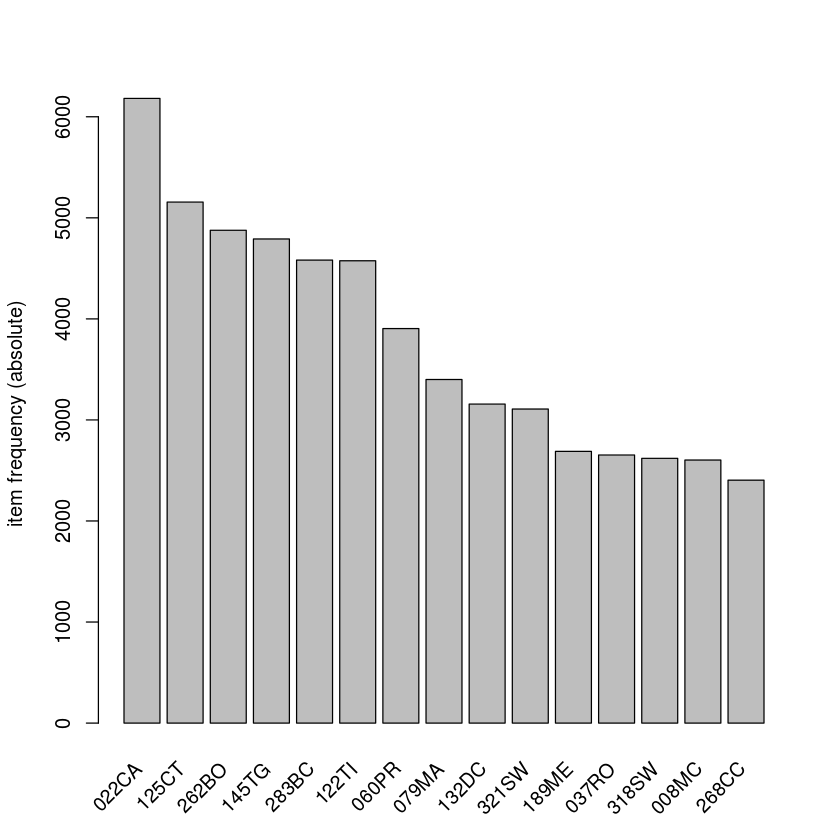

In [9]:
itemFrequencyPlot(mba1, topN=15, type="absolute")

In [10]:
mba <- mba1

In [11]:
rules <- apriori(mba, parameter = list(supp=0.0002, conf=0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   2e-04      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[338 item(s), 74327 transaction(s)] done [0.01s].
sorting and recoding items ... [338 item(s)] done [0.00s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [17 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [12]:
summary(rules)

set of 17 rules

rule length distribution (lhs + rhs):sizes
 3  4 
 5 12 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   4.000   3.706   4.000   4.000 

summary of quality measures:
    support            confidence          lift           count       
 Min.   :0.0002018   Min.   :0.8095   Min.   :11.67   Min.   : 15.00  
 1st Qu.:0.0002287   1st Qu.:0.8196   1st Qu.:12.14   1st Qu.: 17.00  
 Median :0.0002556   Median :0.8500   Median :12.90   Median : 19.00  
 Mean   :0.0004638   Mean   :0.8696   Mean   :18.44   Mean   : 34.47  
 3rd Qu.:0.0003229   3rd Qu.:0.9048   3rd Qu.:13.61   3rd Qu.: 24.00  
 Max.   :0.0036057   Max.   :1.0000   Max.   :45.20   Max.   :268.00  

mining info:
 data ntransactions support confidence
  mba         74327   2e-04        0.8

In [13]:
rules <- sort(rules, by="confidence", decreasing=TRUE)

In [14]:
head(rules)

set of 6 rules 

In [15]:
inspect(rules)

     lhs                       rhs      support      confidence lift     count
[1]  {011CH ,122TI ,206ZI } => {125CT } 0.0003094434 1.0000000  14.41563  23  
[2]  {122TI ,206ZI ,321SW } => {125CT } 0.0002287190 0.9444444  13.61476  17  
[3]  {037RO ,122TI ,206ZI } => {125CT } 0.0003901678 0.9354839  13.48559  29  
[4]  {060PR ,122TI ,206ZI } => {125CT } 0.0002690812 0.9090909  13.10512  20  
[5]  {122TI ,152TR ,206ZI } => {125CT } 0.0002556272 0.9047619  13.04271  19  
[6]  {122TI ,206ZI ,283BC } => {125CT } 0.0002287190 0.8947368  12.89820  17  
[7]  {122TI ,206ZI ,262BO } => {125CT } 0.0003228975 0.8888889  12.81390  24  
[8]  {122TI ,191CB ,206ZI } => {125CT } 0.0002018109 0.8823529  12.71968  15  
[9]  {206ZI ,320SW }        => {125CT } 0.0002287190 0.8500000  12.25329  17  
[10] {079MA ,122TI ,206ZI } => {125CT } 0.0002152650 0.8421053  12.13948  16  
[11] {122TI ,145TG ,206ZI } => {125CT } 0.0002152650 0.8421053  12.13948  16  
[12] {122TI ,132DC ,206ZI } => {125CT } 0.0002556272